# Working with Dates and Times in R

Dates and times are abundant in data and essential for answering questions that start with when, how long, or how often. However, they can be tricky, as they come in a variety of formats and can behave in unintuitive ways. This course teaches you the essentials of parsing, manipulating, and computing with dates and times in R. By the end, you'll have mastered the lubridate package, a member of the tidyverse, specifically designed to handle dates and times. You'll also have applied your new skills to explore how often R versions are released, when the weather is good in Auckland (the birthplace of R), and how long monarchs ruled in Britain.

## Dates and Times in R
R doesn't know something is a date or time unless you tell it. In this chapter you'll learn about some of the ways R stores dates and times by exploring how often R versions are released, and how quickly people download them. You'll also get a sneak peek at what you'll learn in the following chapters.

### Specifying dates
As you saw in the video, R doesn't know something is a date unless you tell it. If you have a character string 
that represents a date in the ISO 8601 standard you can turn it into a Date using the as.Date() function. 
Just pass the character string (or a vector of character strings) as the first argument.
In this exercise you'll convert a character string representation of a date to a Date object.

In [8]:
# We've stored the string "2013-04-03" in a variable called x.

# The date R 3.0.0 was released
x <- '2013-04-03'

# Examine structure of x
str(x)

# Use as.Date() to interpret x as a date
x_date <- as.Date(x)

# Examine structure of x_date
str(x_date)

# Store April 10 2014 as a Date
april_10_2014 <- as.Date('2014-04-10')

 chr "2013-04-03"
 Date[1:1], format: "2013-04-03"


### Automatic import
Sometimes you'll need to input a couple of dates by hand using as.Date() but it's much more common to have a 
column of dates in a data file.
Some functions that read in data will automatically recognize and parse dates in a variety of formats. 
In particular the import functions, like read.csv(), in the readr package will recognize dates in a few common formats.
There is also the anytime() function in the anytime package whose sole goal is to automatically parse strings 
as dates regardless of the format.
Try them both out in this exercise.

In [2]:
# Use read.csv() to import Rreleases.csv
releases <- read.csv('Rreleases.csv')

# Examine the structure of the date column
str(releases$date)

# Load the anytime package
# install.packages('anytime')
library(anytime)

# Various ways of writing Sep 10 2009
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")

# Use anytime() to parse sep_10_2009
anytime(sep_10_2009)

 Factor w/ 104 levels "1/10/1998","1/10/2003",..: 38 35 1 48 73 78 78 92 101 9 ...


Warning message:
"package 'anytime' was built under R version 3.6.3"

[1] "2009-09-10 CEST" "2009-09-10 CEST" "2009-09-10 CEST" "2009-09-10 CEST"

### Automatic import
Sometimes you'll need to input a couple of dates by hand using as.Date() but it's much more common to have a 
column of dates in a data file.
Some functions that read in data will automatically recognize and parse dates in a variety of formats. 
In particular the import functions, like read.csv(), in the readr package will recognize dates in a few common formats.
There is also the anytime() function in the anytime package whose sole goal is to automatically parse strings 
as dates regardless of the format.
Try them both out in this exercise.

Warning message:
"Removed 87 row(s) containing missing values (geom_path)."

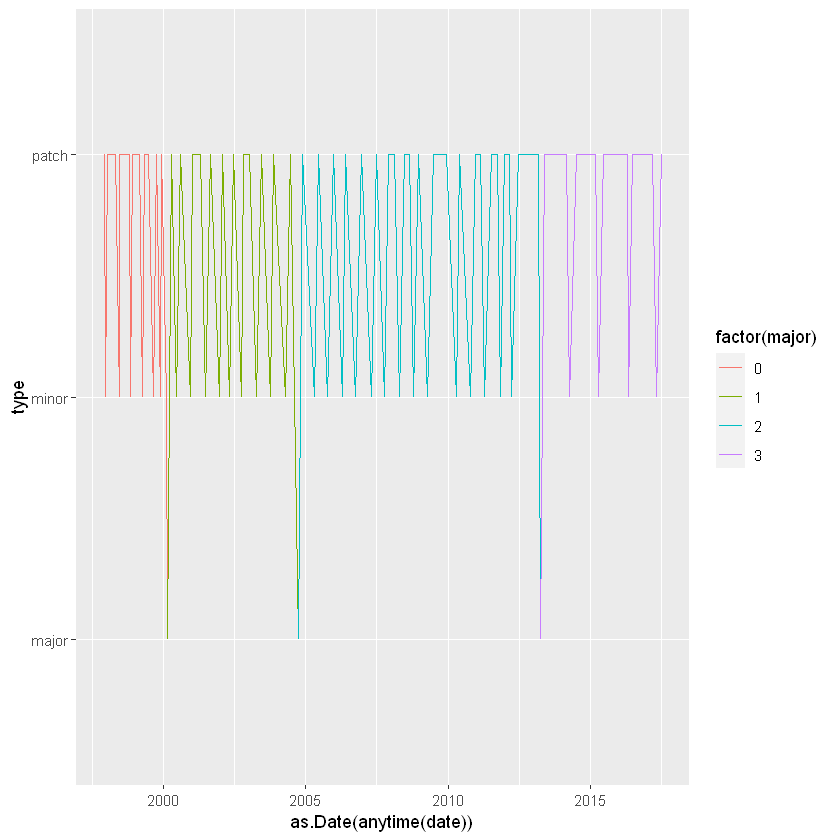

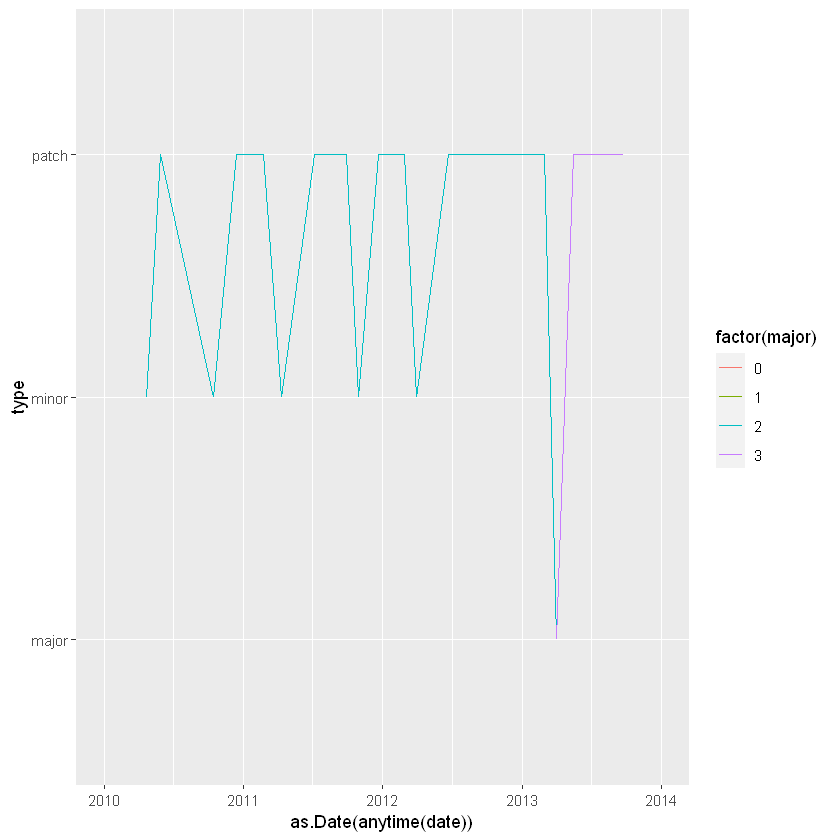

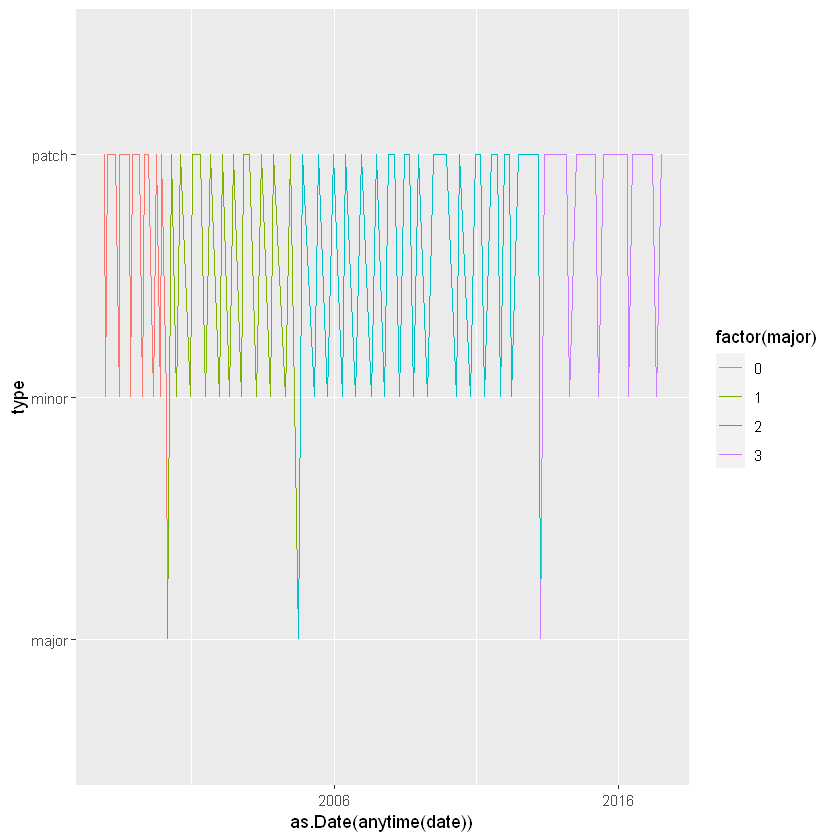

In [3]:
library(ggplot2)

# Make a plot of releases over time by setting the x argument of the aes() function to the date column.
# Set the x axis to the date column
ggplot(releases, aes(x = as.Date(anytime(date)), y = type)) + geom_line(aes(group = 1, color = factor(major)))

# Limit the axis to between 2010-01-01 and 2014-01-01. 
# Notice these strings need to be wrapped in as.Date() to be interpreted as Date objects.
ggplot(releases, aes(x = as.Date(anytime(date)), y = type)) + 
geom_line(aes(group = 1, color = factor(major))) + xlim(as.Date('2010-01-01'), as.Date('2014-01-01'))

# Specify breaks every ten years and labels with "%Y"
ggplot(releases, aes(x = as.Date(anytime(date)), y = type)) + 
geom_line(aes(group = 1, color = factor(major))) + scale_x_date(date_breaks = '10 years', date_labels = '%Y')

### Arithmetic and logical operators
Since Date objects are internally represented as the number of days since 1970-01-01 you can do 
basic math and comparisons with dates. You can compare dates with the usual logical operators (<, ==, > etc.), 
find extremes with min() and max(), and even subtract two dates to find out the time between them.
In this exercise you'll see how these operations work by exploring the last R release. You'll see Sys.date() in the code, 
it simply returns today's date.

In [33]:
# Find the largest date
last_release_date <- max(as.Date(anytime(releases$date)))

# Find the rows in releases that have the most recent date, by specifying the comparison date == last_release_date in filter()
# Filter row for last release
# last_release <- filter(releases, date == last_release_date)

# problem with the type
# desired output: 
#  major minor patch date       datetime            time     type 
#  <int> <int> <int> <date>     <dttm>              <time>   <chr>
# 1     3     4     1 2017-06-30 2017-06-30 07:04:11 07:04:11 patch

# How long since last release?
Sys.Date() - last_release_date


Time difference of 1276 days

### Getting datetimes into R
Just like dates without times, if you want R to recognize a string as a datetime you need to convert it, although now 
you use as.POSIXct(). as.POSIXct() expects strings to be in the format YYYY-MM-DD HH:MM:SS.
The only tricky thing is that times will be interpreted in local time based on your machine's set up. You can check your 
timezone with Sys.timezone(). If you want the time to be interpreted  in a different timezone, you just set the tz argument 
of as.POSIXct(). You'll learn more about time zones in Chapter 4.
In this exercise you'll input a couple of datetimes by hand and then see that read.csv() also handles datetimes automatically
in a lot of cases.

In [35]:
# Use as.POSIXct() and an appropriate string to input the datetime corresponding to Oct 1st 2010 at 12:12:00.

as.POSIXct("2010-10-01 12:12:00")

# Enter the same datetime again, but now specify the timezone as "America/Los_Angeles".
as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")

# Use read.csv() to import Rreleases.csv
releases <- read.csv('Rreleases.csv')

# Examine the structure of the date column
str(releases$datetime)

[1] "2010-10-01 12:12:00 CEST"

[1] "2010-10-01 12:12:00 PDT"

 Factor w/ 105 levels "1997-12-04T08:47:58Z",..: 1 2 3 4 5 6 7 8 9 10 ...


### Datetimes behave nicely too
Just like Date objects, you can plot and do math with POSIXct objects.
As an example, in this exercise you'll see how quickly people download new versions of R, 
by examining the download logs from the RStudio CRAN mirror.

              datetime r_version country
1 2015-04-16T22:40:19Z     3.1.3      CO
2 2015-04-16T09:11:04Z     3.1.3      GB
3 2015-04-16T17:12:37Z     3.1.3      DE
4 2015-04-18T12:34:43Z     3.2.0      GB
5 2015-04-16T04:49:18Z     3.1.3      PE
6 2015-04-16T06:40:44Z     3.1.3      TW


datetime,r_version,country
2015-04-18T12:34:43Z,3.2.0,GB
2015-04-18T15:41:32Z,3.2.0,CA
2015-04-18T14:58:41Z,3.2.0,IE
2015-04-18T16:44:45Z,3.2.0,US
2015-04-18T04:34:35Z,3.2.0,US
2015-04-18T22:29:45Z,3.2.0,CH
2015-04-17T16:21:06Z,3.2.0,US
2015-04-18T20:34:57Z,3.2.0,AT
2015-04-17T18:23:19Z,3.2.0,US
2015-04-18T03:00:31Z,3.2.0,US


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


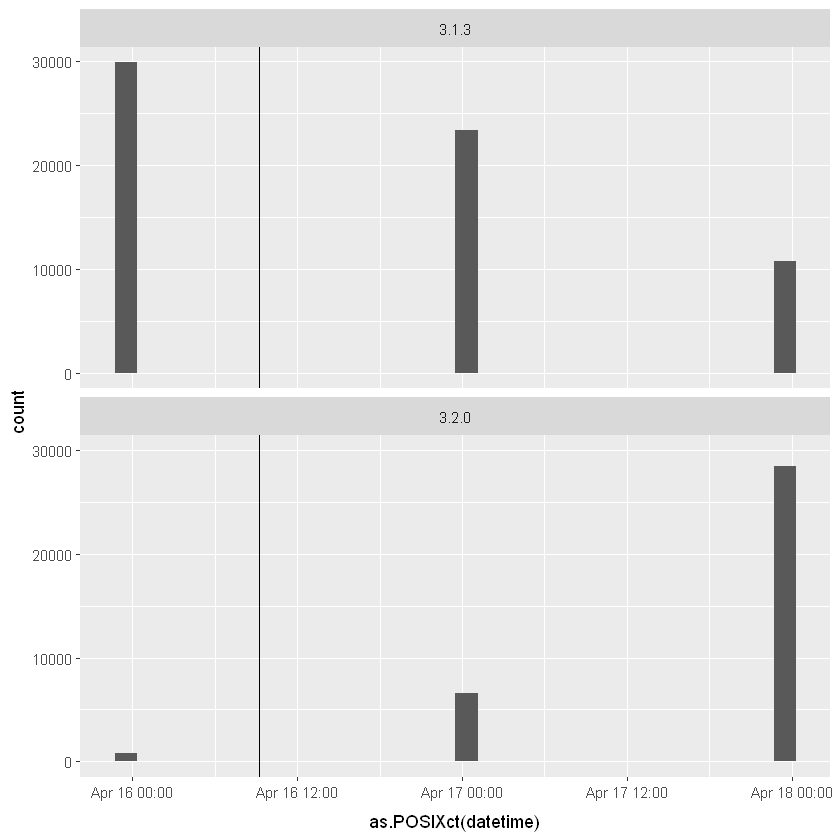

In [51]:
library(tidyverse)
library(dplyr)
# Use read.csv() to import Cranlogs.csv
logs <- read.csv('Cranlogs.csv')
# print losgs
print(head(logs))
# Store the release time as a POSIXct object
release_time <- as.POSIXct("2015-04-16 07:13:33", tz = "UTC")

# When is the first download of 3.2.0?
logs %>% 
  filter(as.POSIXct(datetime) > release_time,
    r_version == "3.2.0")

# Finally see how downloads increase by creating histograms of download time for 3.2.0 and the previous version 3.1.3
ggplot(logs, aes(x = as.POSIXct(datetime))) + geom_histogram() + 
                 geom_vline(aes(xintercept = as.numeric(release_time)))+ facet_wrap(~ r_version, ncol = 1)